# Exploration de la BD DeepDrive #

Dans ce notebook, on va explorer la BD DeepDrive contenant une grande variété d'images de scènes routière étiquetées dans de nombreuses conditions météorologiques dégradées. 

Dans un premier temps, je vais explorer la BD, à savoir le nombre et la taille des images qu'elle possède. Dans un second temps, je vais voir quel type d'images en conditions dégradées sont disponibles dans cette BD, afin de voir si certaines images contiennent de fortes conditions dégradées ou uniquement des faibles précipitations.

Lien vers le site officiel de la BD : https://bair.berkeley.edu/blog/2018/05/30/bdd/

In [9]:
import os
import imageio

# Structure des dossiers de la BD

path = "/Users/rblin/Downloads/bdd100k"

dossiers = os.listdir(path)
print("Contenu du dossier bdd100k : ")
print(dossiers)

images_path = path + "/" + dossiers[1]

images = sorted(os.listdir(images_path))
print("Contenu du sous-dossier images : ")
print(images)

images_100k_path = images_path + "/" + images[1]
images_10k_path = images_path + "/" + images[2]

images_100k = sorted(os.listdir(images_100k_path))
images_10k = sorted(os.listdir(images_10k_path))

print("Contenu du sous-dossier 100k : ")
print(images_100k)

# On va d'abord se focaliser sur le sous-dossier 100k

images_100k_test = sorted(os.listdir(images_100k_path + "/" + images_100k[1]))
images_100k_train = sorted(os.listdir(images_100k_path + "/" + images_100k[2]))
images_100k_val = sorted(os.listdir(images_100k_path + "/" + images_100k[3]))

image_100k = imageio.imread(images_100k_path + "/" + images_100k[1] + "/" + images_100k_test[0])

print("Caractéristiques du sous-dossier 100k : ")
print("Nombre d'images de test : ", len(images_100k_test))
print("Nombre d'images de train : ", len(images_100k_test))
print("Nombre d'images de val : ", len(images_100k_test))
print("Taille de l'image : ", image_100k.shape)

# Focalisons-nous maintenant sur le sous-dossier 10k

images_10k_test = sorted(os.listdir(images_10k_path + "/" + images_10k[1]))
images_10k_train = sorted(os.listdir(images_10k_path + "/" + images_10k[2]))
images_10k_val = sorted(os.listdir(images_10k_path + "/" + images_10k[3]))

image_10k = imageio.imread(images_10k_path + "/" + images_10k[1] + "/" + images_10k_test[0])

print("Caractéristiques du sous-dossier 10k : ")
print("Nombre d'images de test : ", len(images_10k_test))
print("Nombre d'images de train : ", len(images_10k_test))
print("Nombre d'images de val : ", len(images_10k_test))
print("Taille de l'image : ", image_10k.shape)

Contenu du dossier bdd100k : 
['.DS_Store', 'images', 'labels']
Contenu du sous-dossier images : 
['.DS_Store', '100k', '10k']
Contenu du sous-dossier 100k : 
['.DS_Store', 'test', 'train', 'val']
Caractéristiques du sous-dossier 100k : 
Nombre d'images de test :  20000
Nombre d'images de train :  20000
Nombre d'images de val :  20000
Taille de l'image :  (720, 1280, 3)
Caractéristiques du sous-dossier 10k : 
Nombre d'images de test :  2000
Nombre d'images de train :  2000
Nombre d'images de val :  2000
Taille de l'image :  (720, 1280, 3)


Les images ayant la même taille et le même nombre de canaux dans les dossiers 100k et 10k, on va travailler sur le dossier 100k par la suite, car celui-ci est suscpetible d'avoir une plus grande variabilité d'images et donc de couvrir plus de situations en conditions météorologiques dégradées. 

[414, 19631, 17601, 15085, 11871, 13106, 952, 18772, 1460, 17731, 5383, 2116, 11433, 8807, 2595, 14978, 7653, 1754, 4627, 10064, 9110, 2913, 15384, 4929]


<Figure size 432x288 with 0 Axes>

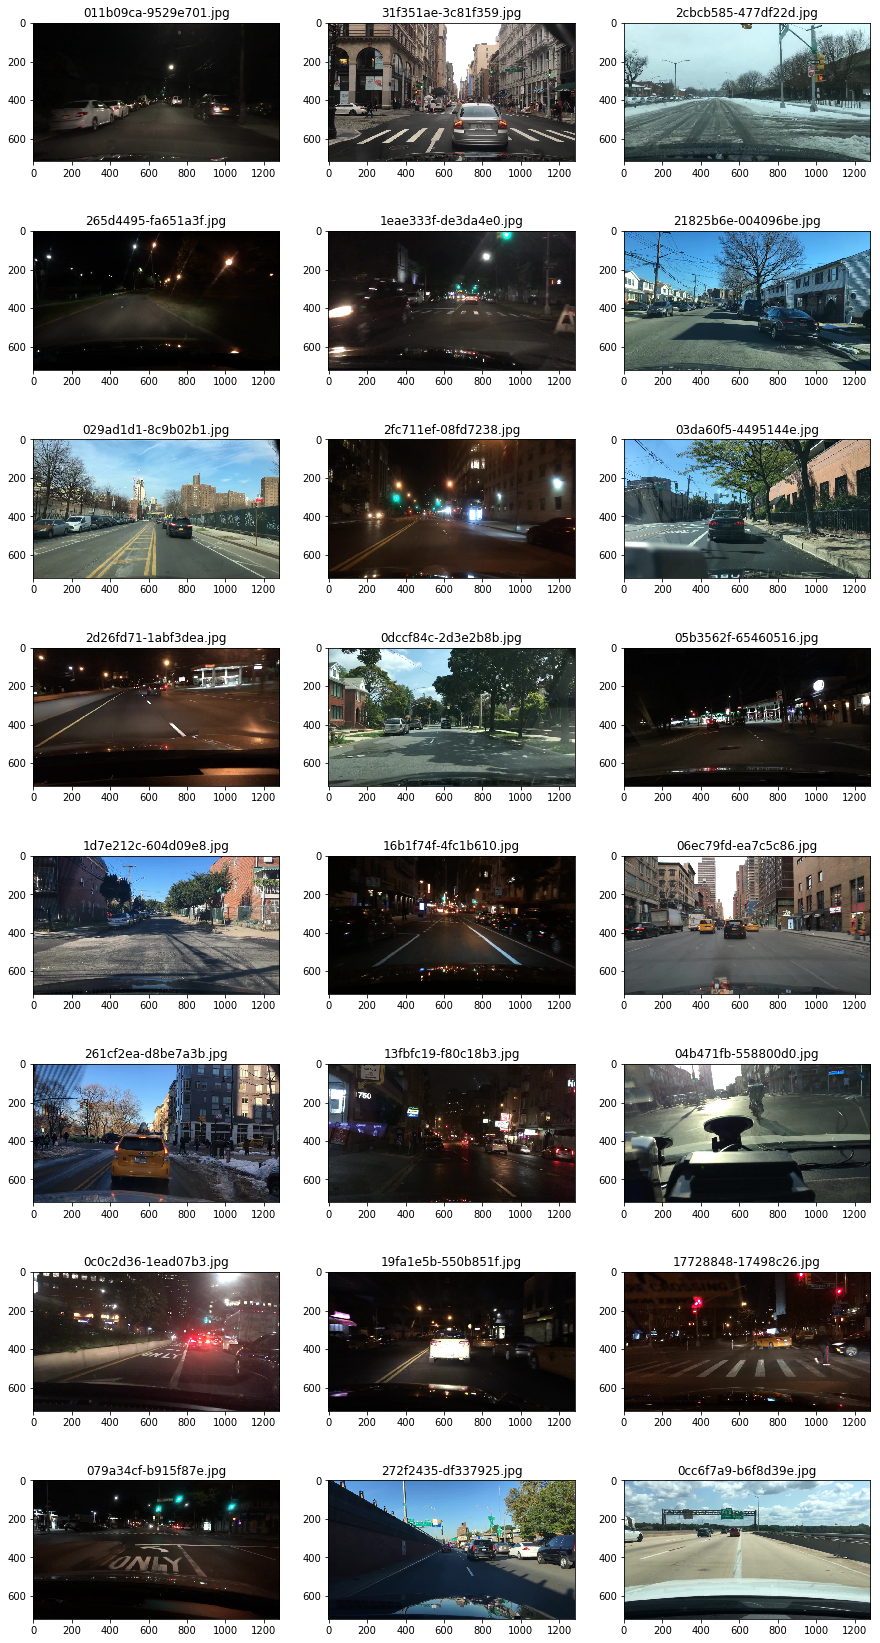

In [24]:
# Affichage d'images au hasard de la base de train

import pylab as pl
import random

images_100k_train_path = images_100k_path + "/" + images_100k[2]

indexes = random.sample(range(0,20000),24)
print(indexes)

pl.figure(1)
pl.figure(figsize=(15,30))
pl.clf()
for i in range(24) :
    pl.subplot(8,3,i+1)
    im_temp_path = images_100k_train_path + "/" + images_100k_train[indexes[i]]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(images_100k_train[indexes[i]])

Après plusieurs essais d'affichage, on retrouve des images de nuit, des images prises lorsque la chaussée est mouillée ou enneigée.

Afin de trouver s'il existe des images en conditions météorologiques très dégradées, je vais explorer le dossier des labels afin de retrouver des images étiquetées comme étant en conditions météorologiques dégradées. 

<Figure size 432x288 with 0 Axes>

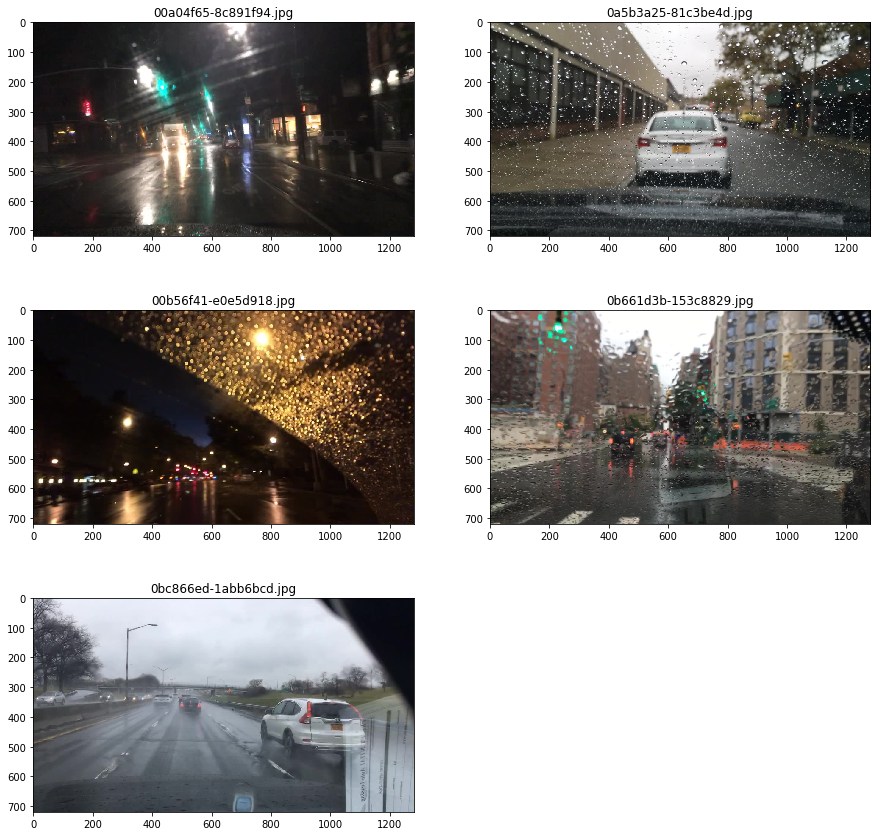

In [27]:
# 5206 images au total
index_pluie = ["00a04f65-8c891f94.jpg", "0a5b3a25-81c3be4d.jpg", 
              "00b56f41-e0e5d918.jpg", "0b661d3b-153c8829.jpg",
              "0bc866ed-1abb6bcd.jpg", ]

# Affichage des images retenues pour la pluie 

pl.figure(2)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(5) :
    pl.subplot(3,2,i+1)
    im_temp_path = images_100k_train_path + "/" + index_pluie[i]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(index_pluie[i])

<Figure size 432x288 with 0 Axes>

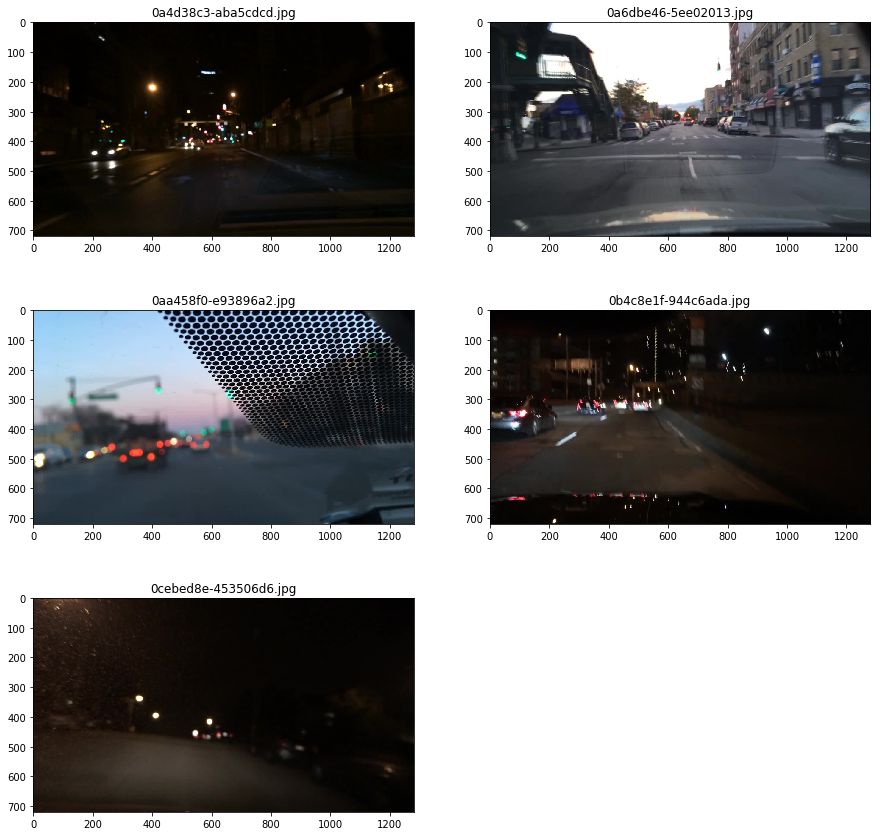

In [28]:
# Affichage des images floues 

index_flou = ["0a4d38c3-aba5cdcd.jpg", "0a6dbe46-5ee02013.jpg", 
             "0aa458f0-e93896a2.jpg", "0b4c8e1f-944c6ada.jpg",
             "0cebed8e-453506d6.jpg", ]

pl.figure(3)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(5) :
    pl.subplot(3,2,i+1)
    im_temp_path = images_100k_train_path + "/" + index_flou[i]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(index_flou[i])

<Figure size 432x288 with 0 Axes>

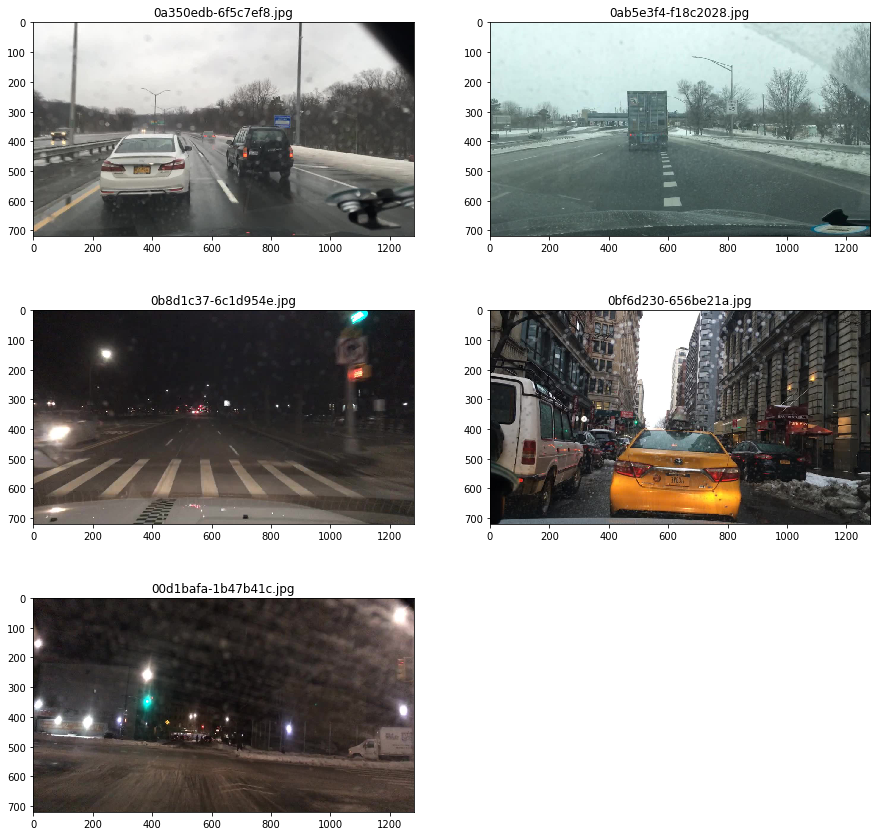

In [29]:
# Affichage des images en temps de neige 

# 5549 images au total
index_neige = ["0a350edb-6f5c7ef8.jpg", "0ab5e3f4-f18c2028.jpg", 
              "0b8d1c37-6c1d954e.jpg", "0bf6d230-656be21a.jpg",
              "00d1bafa-1b47b41c.jpg", ]

pl.figure(4)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(5) :
    pl.subplot(3,2,i+1)
    im_temp_path = images_100k_train_path + "/" + index_neige[i]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(index_neige[i])

<Figure size 432x288 with 0 Axes>

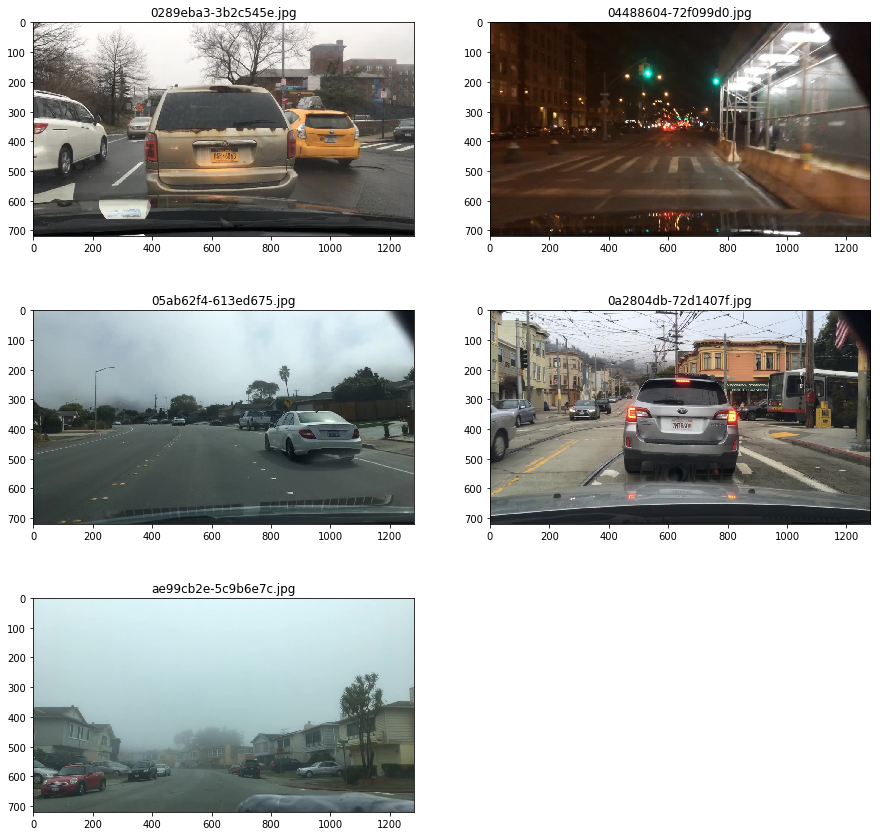

In [30]:
# Affichage des images en temps de brouillard

# 130 images au total
index_brouillard = ["0289eba3-3b2c545e.jpg", "04488604-72f099d0.jpg",
                   "05ab62f4-613ed675.jpg", "0a2804db-72d1407f.jpg",
                   "ae99cb2e-5c9b6e7c.jpg"]

pl.figure(5)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(5) :
    pl.subplot(3,2,i+1)
    im_temp_path = images_100k_train_path + "/" + index_brouillard[i]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(index_brouillard[i])

<Figure size 432x288 with 0 Axes>

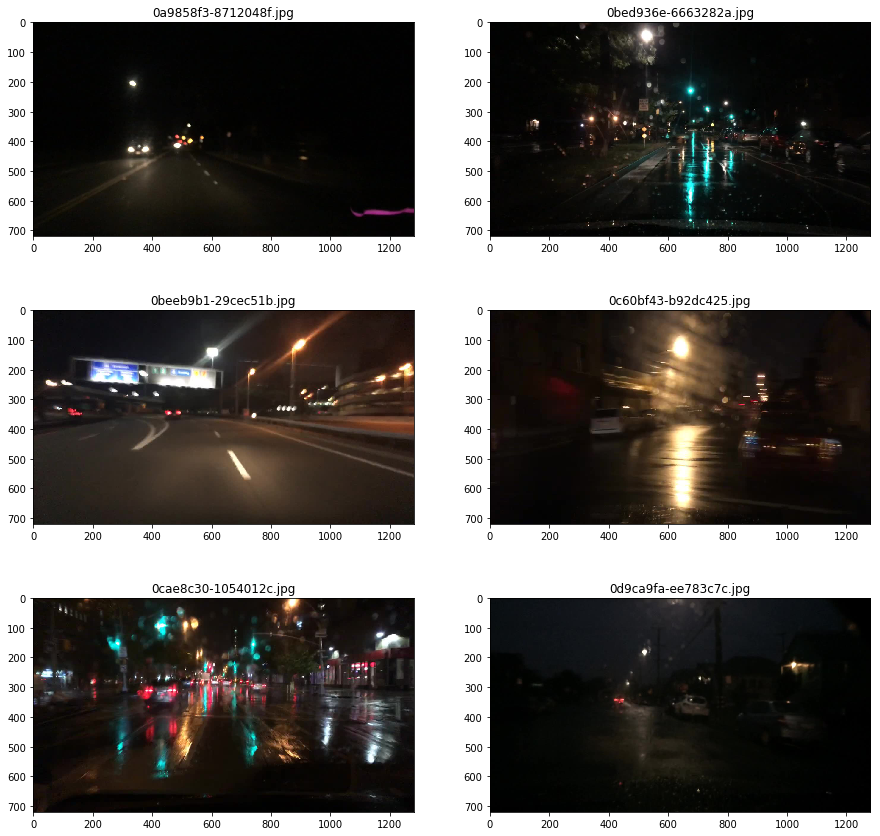

In [31]:
# Affichage des images la nuit

index_nuit = ["0a9858f3-8712048f.jpg", "0bed936e-6663282a.jpg",
             "0beeb9b1-29cec51b.jpg", "0c60bf43-b92dc425.jpg", 
             "0cae8c30-1054012c.jpg", "0d9ca9fa-ee783c7c.jpg"]

pl.figure(6)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(6) :
    pl.subplot(3,2,i+1)
    im_temp_path = images_100k_train_path + "/" + index_nuit[i]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(index_nuit[i])

<Figure size 432x288 with 0 Axes>

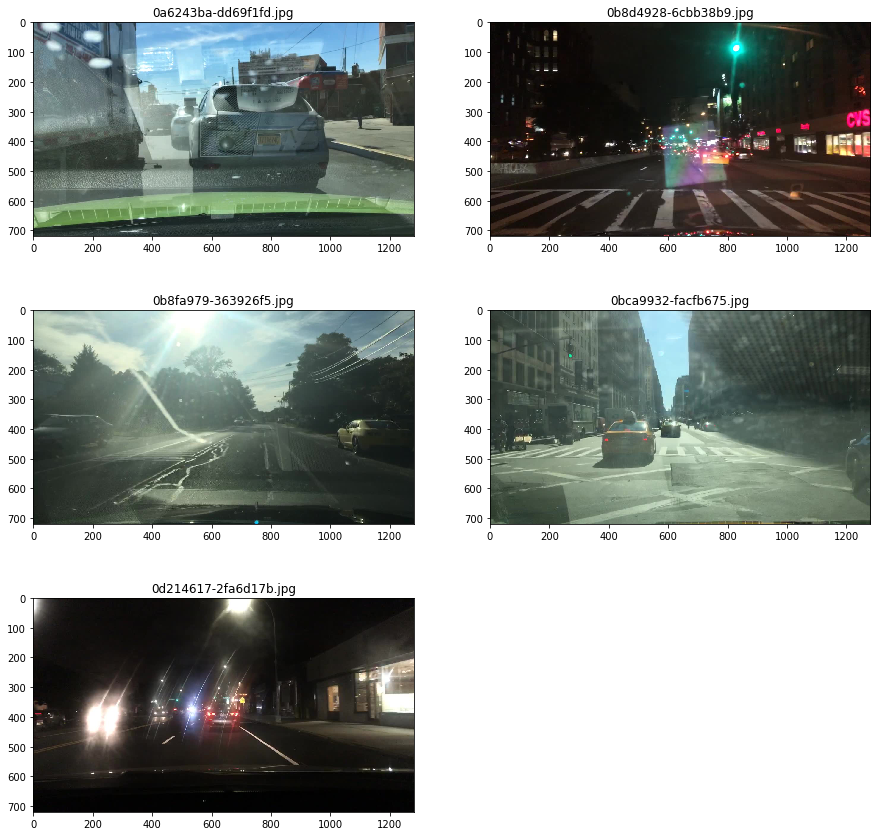

In [32]:
# Affichage des images pour lesquelles il y a un reflet sur le pare-brise

index_reflet = ["0a6243ba-dd69f1fd.jpg", "0b8d4928-6cbb38b9.jpg",
               "0b8fa979-363926f5.jpg", "0bca9932-facfb675.jpg",
               "0d214617-2fa6d17b.jpg"]

pl.figure(7)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(5) :
    pl.subplot(3,2,i+1)
    im_temp_path = images_100k_train_path + "/" + index_reflet[i]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(index_reflet[i])

<Figure size 432x288 with 0 Axes>

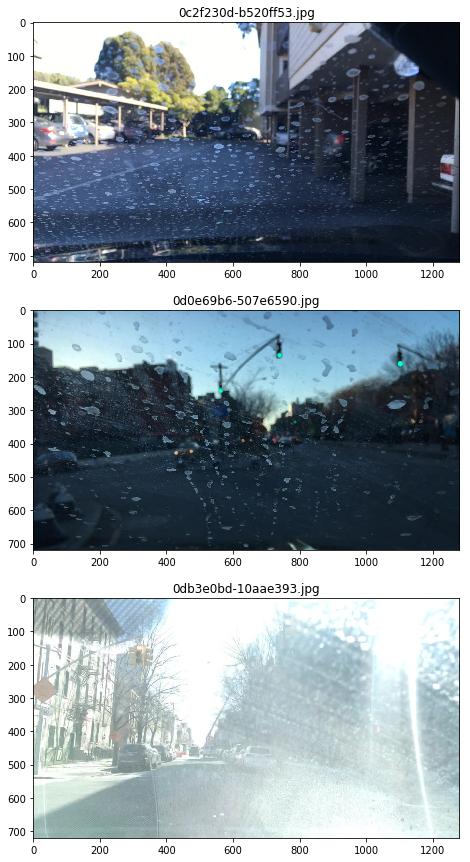

In [33]:
# Afichage des images sur lesquelles le pare-brise est sale

index_sale = ["0c2f230d-b520ff53.jpg", "0d0e69b6-507e6590.jpg",
             "0db3e0bd-10aae393.jpg" ]

# Affichage des images retenues pour la pluie 

pl.figure(8)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(3) :
    pl.subplot(3,1,i+1)
    im_temp_path = images_100k_train_path + "/" + index_sale[i]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(index_sale[i])

Maintenant que l'on a affiché un échantillon des images qui ne sont pas prises en conditions optimales, affichons les étiquettes de certaines images afin de voir comment les images sont segmentées.

dict_keys(['name', 'attributes', 'timestamp', 'labels'])
{'x1': 507.82755, 'y1': 221.727518, 'x2': 908.367588, 'y2': 442.715126}


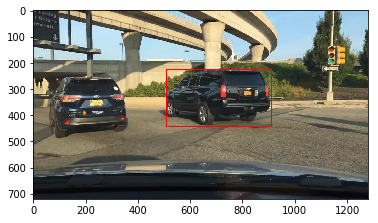

In [49]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# 1 - Lire le fichier json

with open('/Users/rblin/Documents/test_json.json', 'r') as f:
    dict_label = json.load(f)
    
print(dict_label[0].keys())

# 2 - Convertir les données en dictionnaire pour être utilisées par Python
# 3 - Afficher quelques étiquettes, pas toutes sinon ça sera trop long

labels = dict_label[0]['labels']

car_exemple = labels[5]

dimensions = car_exemple["box2d"]

print(dimensions)

# Tracé de la bounding box sur l'image 

x = dimensions["x1"]
y = dimensions["y1"]
h = dimensions["y2"] - dimensions["y1"]
w = dimensions["x2"] - dimensions["x1"]

im = np.array(Image.open(images_100k_train_path + "/" + dict_label[0]["name"]), dtype=np.uint8)
fig,ax = plt.subplots(1)
ax.imshow(im)
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

# On voit bien que le rectangle encadre bien la voiture